In [32]:
%matplotlib inline

In [33]:
import numpy as np
import pandas as pd

In [34]:
#DataFrame de gases de efecto invernadero
data_gei = pd.read_csv('AIR_GHG_25052020042039897.csv' )

In [35]:
import matplotlib.pyplot as plt

In [36]:
countries = pd.DataFrame(data_gei["Country"])

In [37]:
countries = countries.drop_duplicates()

In [38]:
data_gei.head(3)

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,420315.323,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,421381.463,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,425702.483,NaN,NaN


## Limpiar Datos

Se va a modificar todos los valoers para cambiar el 'NaN' por 0. Esto para poder graficar de forma consistente las imagenes de los gifs

# Etiquetando paises importantes

In [39]:
important_countries = ["Finland","United States", "Mexico", "France", "Japan"]

# Obteniendo etiquetas

In [40]:
units = pd.DataFrame(data_gei.Unit.drop_duplicates())
units

,Unit
0,Tonnes of CO2 equivalent
28,Index
56,Kilograms per capita
13020,Kilograms per 1 000 US dollars
33026,Percentage


In [41]:
years = pd.DataFrame(data_gei.Year.drop_duplicates())

In [42]:
varsi = pd.DataFrame(data_gei.VAR.drop_duplicates())

In [43]:
types_pollullant = pd.DataFrame(data_gei["Pollutant"].drop_duplicates())

In [44]:
activities = pd.DataFrame(data_gei["Variable"].drop_duplicates())
print(activities)

                                               Variable
0                     Total  emissions excluding LULUCF
28               Total GHG excl. LULUCF, Index 1990=100
56                    Total GHG excl. LULUCF per capita
8510                                          5 - Waste
8594            2- Industrial processes and product use
8650                                         1 - Energy
8927                                    3 - Agriculture
9456                                          6 - Other
13020            Total GHG excl. LULUCF per unit of GDP
13956                           1A1 - Energy Industries
13984   Land use, land-use change and forestry (LULUCF)
14012               1A4 - Residential and other sectors
14040                              1A5 - Energy - Other
14062                1B - Fugitive Emissions from Fuels
14118   1A2 - Manufacturing industries and construction
14286                                   1A3 - Transport
22144            Total GHG excl. LULUCF, Index 2

# Segmentando los datos por tipos de emisiones

In [45]:
#Emisiones de paises importantes
emissions_ic = data_gei[data_gei.Country.isin(important_countries)]

Se va a seleccionar un Frame con  los paises destacados, ademas la columna de Pollulants será la correspondiente a 'Greenhouse gases'. Y a su vez la variable será unicamente 'Total  emissions excluding LULUCF'.

In [46]:
#Emisiones totales
emisiones_totales = emissions_ic.copy()[(emissions_ic["Variable"] == "Total  emissions excluding LULUCF") &
                                        (emissions_ic["Unit"]== "Tonnes of CO2 equivalent") &
                                        (emissions_ic["Pollutant"] == "Greenhouse gases")]

Mismos criterios que en el anterior, solo que esta vez se cambiara la Variable por "1 - Energy", con ello se obtendrán las emisiones derivadas del consumo de energías de los países seleccionados.

In [47]:
#Emisiones per capita
emisiones_percapita = emissions_ic.copy()[(emissions_ic["Unit"]== "Kilograms per capita") & 
                                          (emissions_ic["Pollutant"] == "Greenhouse gases")]
#Las unidades son miles de KG

In [48]:
#Emisiones por energía
emisiones_energia = emissions_ic.copy()[(emissions_ic["Variable"] == "1 - Energy") &
                                        (emissions_ic["Unit"]== "Tonnes of CO2 equivalent") &
                                        (emissions_ic["Pollutant"] == "Greenhouse gases")]

In [49]:
#Emisiones por industria
emisiones_industria = emissions_ic.copy()[(emissions_ic["Variable"] == "2- Industrial processes and product use") &
                                        (emissions_ic["Unit"]== "Tonnes of CO2 equivalent") &
                                        (emissions_ic["Pollutant"] == "Greenhouse gases")]

In [50]:
#Emisiones por industria energetica
emisiones_industriaEnergetica = emissions_ic.copy()[(emissions_ic["Variable"] == "1A1 - Energy Industries") &
                                        (emissions_ic["Unit"]== "Tonnes of CO2 equivalent") &
                                        (emissions_ic["Pollutant"] == "Greenhouse gases")]

In [51]:
#Emisiones por gastos (Waste)
emisiones_gasto = emissions_ic.copy()[(emissions_ic["Variable"] == "5 - Waste") &
                                        (emissions_ic["Unit"]== "Tonnes of CO2 equivalent") &
                                        (emissions_ic["Pollutant"] == "Greenhouse gases")]

In [52]:
#Emisiones agricultura
emisiones_agricultura = emissions_ic.copy()[(emissions_ic["Variable"] == "3 - Agriculture") &
                                        (emissions_ic["Unit"]== "Tonnes of CO2 equivalent") &
                                        (emissions_ic["Pollutant"] == "Greenhouse gases")]


In [53]:
#Emisiones por combustibles
emisiones_combustibles = emissions_ic.copy()[(emissions_ic["Variable"] == "1B - Fugitive Emissions from Fuels") &
                                        (emissions_ic["Unit"]== "Tonnes of CO2 equivalent") &
                                        (emissions_ic["Pollutant"] == "Greenhouse gases")]

In [54]:
#Emisiones por transporte
emisiones_transporte = emissions_ic.copy()[(emissions_ic["Variable"] == "1A3 - Transport") &
                                        (emissions_ic["Unit"]== "Tonnes of CO2 equivalent") &
                                        (emissions_ic["Pollutant"] == "Greenhouse gases") & 
                                        (emissions_ic["Year"].isin([2014]))]
#Se va a experimentar cambiando el valor del año posteriormente para graficar

In [55]:
#Emisiones Finlandia
emisiones_totales_finlandia = emisiones_totales[["Year","Value","Country"]][emisiones_totales.Country == "Finland"]


In [56]:
emisiones_totales_mexico = emisiones_totales[["Year","Value","Country"]][emisiones_totales.Country == "Mexico"]


Ahora se creara una función en la que se va a ir iterando para producir una nueva grafica en cada nuevo año. La grafica se graficará con una función semejante a esta `emisiones_transporte[["Country", "Value"]].plot(x="Country", y="Value", kind="bar", figsize=(10,11), fontsize=10)`
Se deberá de establecer un tamaño fijo para cada una de las graficas, estas se volverán un gif.

gif_total = createGif(list_images)

In [57]:
#df.groupby("genres")["gross"].sum().plot(kind="bar",legend="Reverse")
#emisiones_transporte[["Country", "Value"]].groupby("Country").plot(kind="bar", style="dict", x="Country")

In [58]:
#emisiones_transporte[["Country", "Value"]].plot(x="Country", y="Value", kind="bar",figsize=(18,15), fontsize=7)


In [59]:
#emisiones_transporte[["Country", "Value"]].groupby("Country").plot(kind="bar", style="dict", x="Country")

In [60]:
#emisiones_totales[["Value","Country","Year"]].groupby(["Year"])["Value"].plot(kind="bar", legend="reverse")

In [61]:
emisiones_transporte[["Year","Country","Value"]].groupby("Country")

Sintaxis para encontrar un dato especifico dentro de un `DataFrame` utilizando indexación 
`iloc
dat.iloc[fila, columna]`


---

In [62]:
#total_emissions = emissions_important_countries[["Country", "Variable", "Year", "Value"]]

In [63]:
#total_emissions = emissions_important_countries[emissions_important_countries["Variable"] == "Total  emissions excluding LULUCF"]

---

In [64]:
#Creación de DataFrames con años por filas y paises por columnas



# Graficas con variaciones por años

A continuacion se muestran diferentes graficas con las emisiones de CO_2 y otros gases a lo largo de los años (1990 - 2017) en el eje de las X y con la cantidad de emisiones en Toneladas en el eje de las Y. 

### Emisiones totales

In [65]:
#Base para combinar diferentes graficos
#fig, ax = plt.subplots()
#emisiones_totales[["Year","Country","Value"]].groupby("Country").plot(x="Year", y="Value", ax=ax, legend=False,figsize=(15,10))

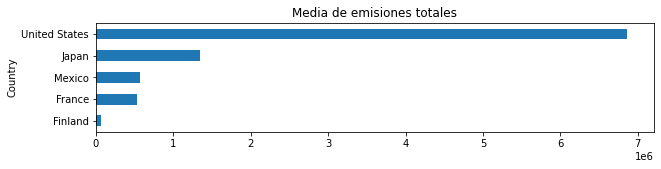

In [66]:
emisiones_totales.groupby('Country')['Value'].mean().sort_values().plot(kind='barh', figsize=(10,2),
                          title="Media de emisiones totales")

#### Finlandia






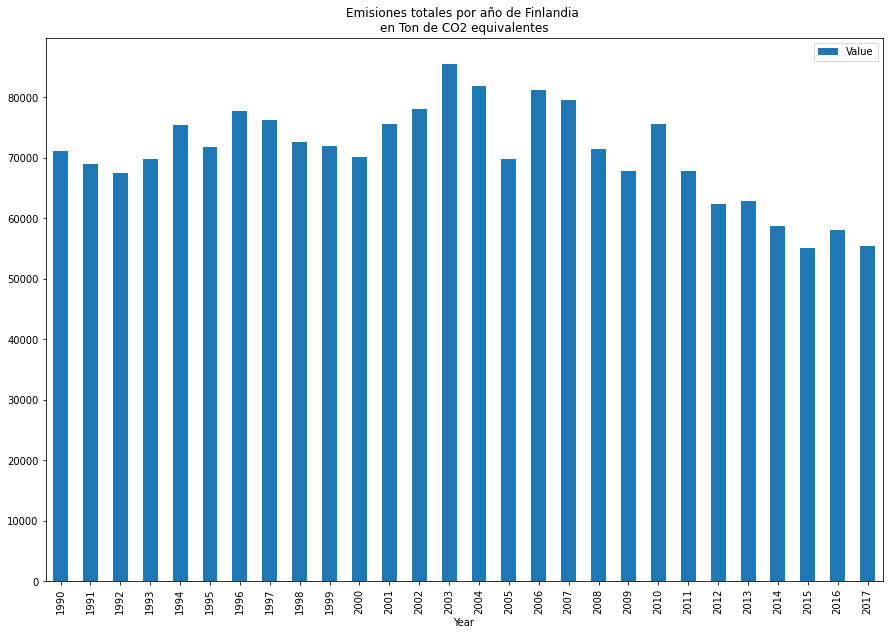

In [67]:
emisiones_totales_finlandia.plot(kind="bar", x="Year", y="Value",
                                 title="Emisiones totales por año de Finlandia \nen Ton de CO2 equivalentes",
                                 figsize=(15,10))

D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

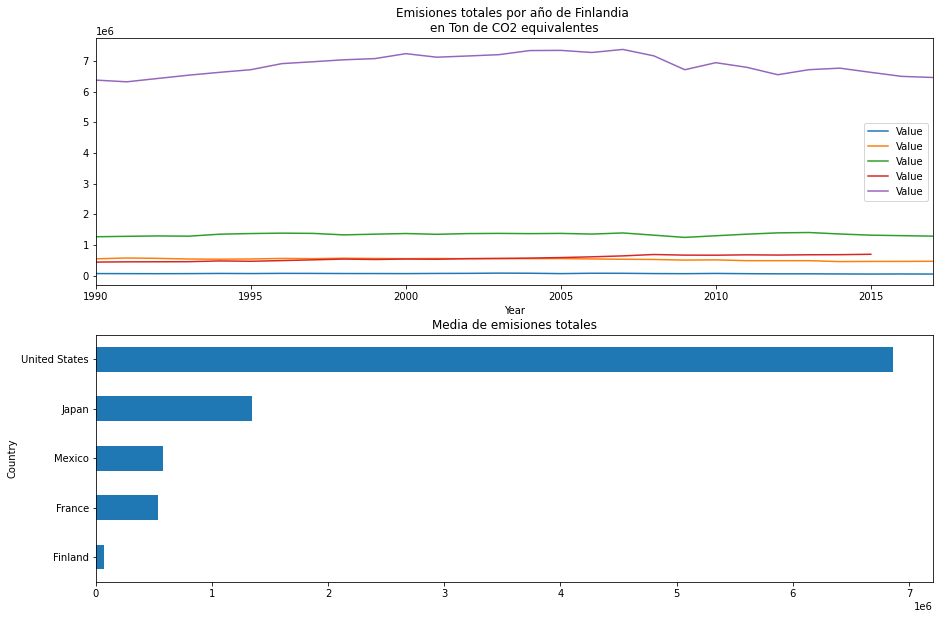

In [76]:
#Molde para crear los otros graficos
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.ylabel(ylabel="Valor")
emisiones_totales.groupby("Country").plot(kind="line", ax=ax1, x="Year", y="Value",
                                 title="Emisiones totales por año de Finlandia \nen Ton de CO2 equivalentes",
                                 figsize=(15,10))

emisiones_totales.groupby('Country')['Value'].mean().sort_values().plot(kind='barh', ax=ax2, figsize=(15,10),
                          title="Media de emisiones totales")

In [69]:
#pd.DataFrame(emisiones_totales[["Country","Value","Year"]].Country[emisiones_totales.Country == "Mexico"])
#pd.DataFrame(emisiones_totales[["Country","Value","Year"]][emisiones_totales.Country == "Mexico"])

In [77]:
#pd.DataFrame(emisiones_totales[["Country","Value","Year"]][emisiones_totales.Country == "Finland"])

In [79]:
#fig = plt.subplot(111)
for country in important_countries:
 # pd.DataFrame(emisiones_totales[["Country","Value","Year"]][emisiones_totales.Country == country]).plot(x="Year", label=country)
  #plt.legend(country)
  print(country)

#plt.show()
print(set(important_countries))

Finland
United States
Mexico
France
Japan
{'United States', 'Japan', 'France', 'Mexico', 'Finland'}


In [81]:
#line_mexico = plt.plot( emisiones_totales["Value", "Country", "Year"][emisiones_totales.Country == "Mexico"][0] )
#emisiones_totales[["Value", "Country", "Year"]][emisiones_totales.Country == "Mexico"].Value

D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

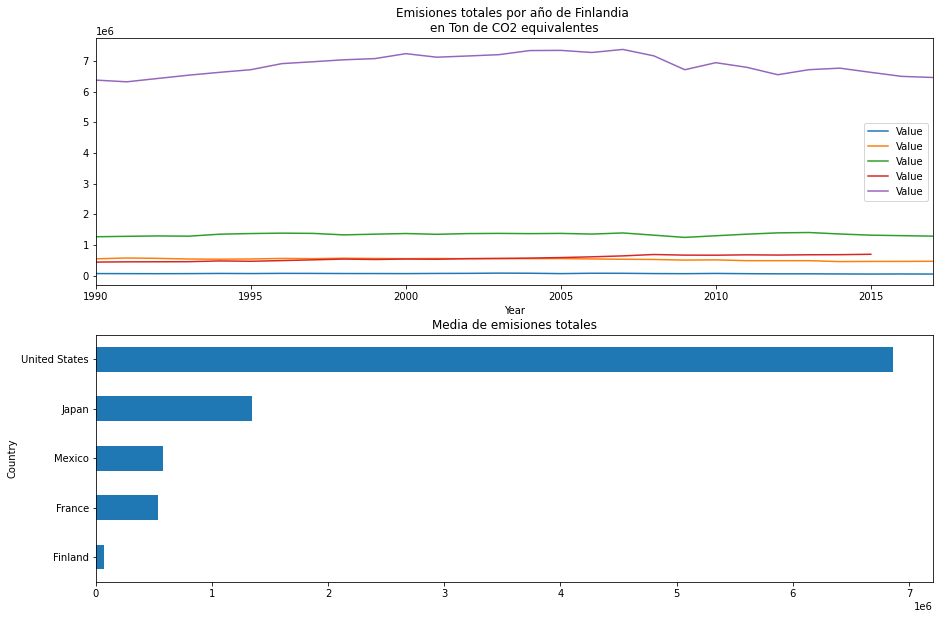

In [73]:
#Molde para crear los otros graficos
fig, (ax1, ax2) = plt.subplots(2, 1)

emisiones_totales.groupby("Country").plot(kind="line", ax=ax1, x="Year", y="Value",
                                 title="Emisiones totales por año de Finlandia \nen Ton de CO2 equivalentes",
                                 figsize=(15,10))
emisiones_totales.groupby('Country')['Value'].mean().sort_values().plot(kind='barh', ax=ax2, figsize=(15,10),
                          title="Media de emisiones totales")

### Emisiones de industria

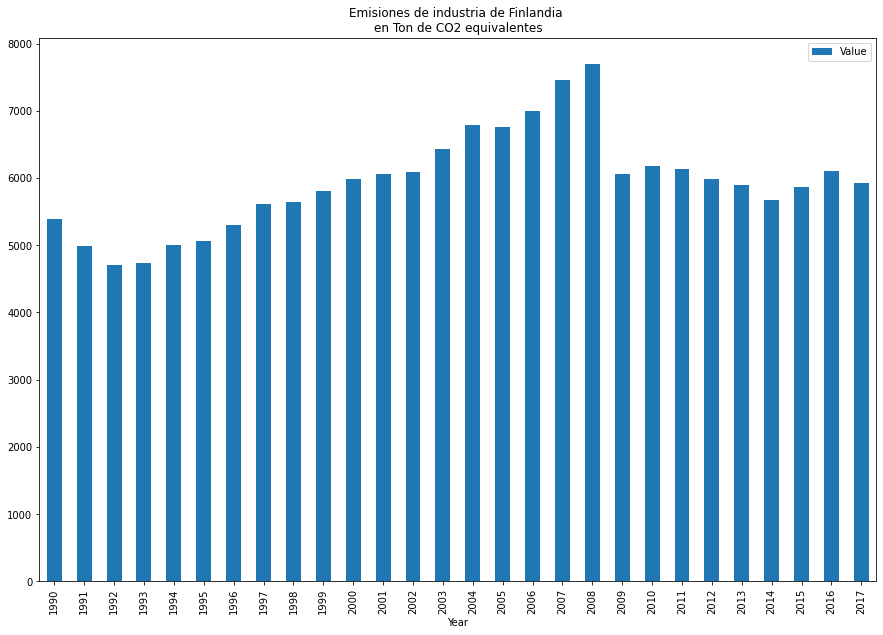

In [74]:
emisiones_industria[emisiones_industria.Country == "Finland"].plot(kind="bar", x="Year", y="Value",
                                 title="Emisiones de industria de Finlandia \nen Ton de CO2 equivalentes",
                                 figsize=(15,10))

### Emisiones per capita

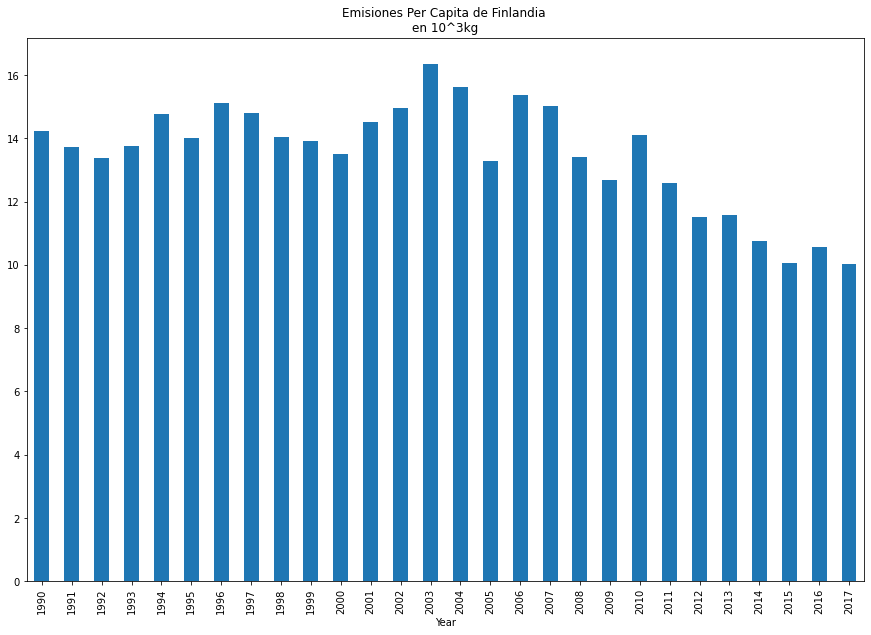

In [89]:
#Emisiones por año Per capita de Finlandia
emisiones_percapita[emisiones_percapita.Country == "Finland"].plot(kind="bar", x="Year", y="Value",
                                 title="Emisiones Per Capita de Finlandia \nen 10^3kg", legend=False,
                                 figsize=(15,10))

### Emisiones de energía

D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

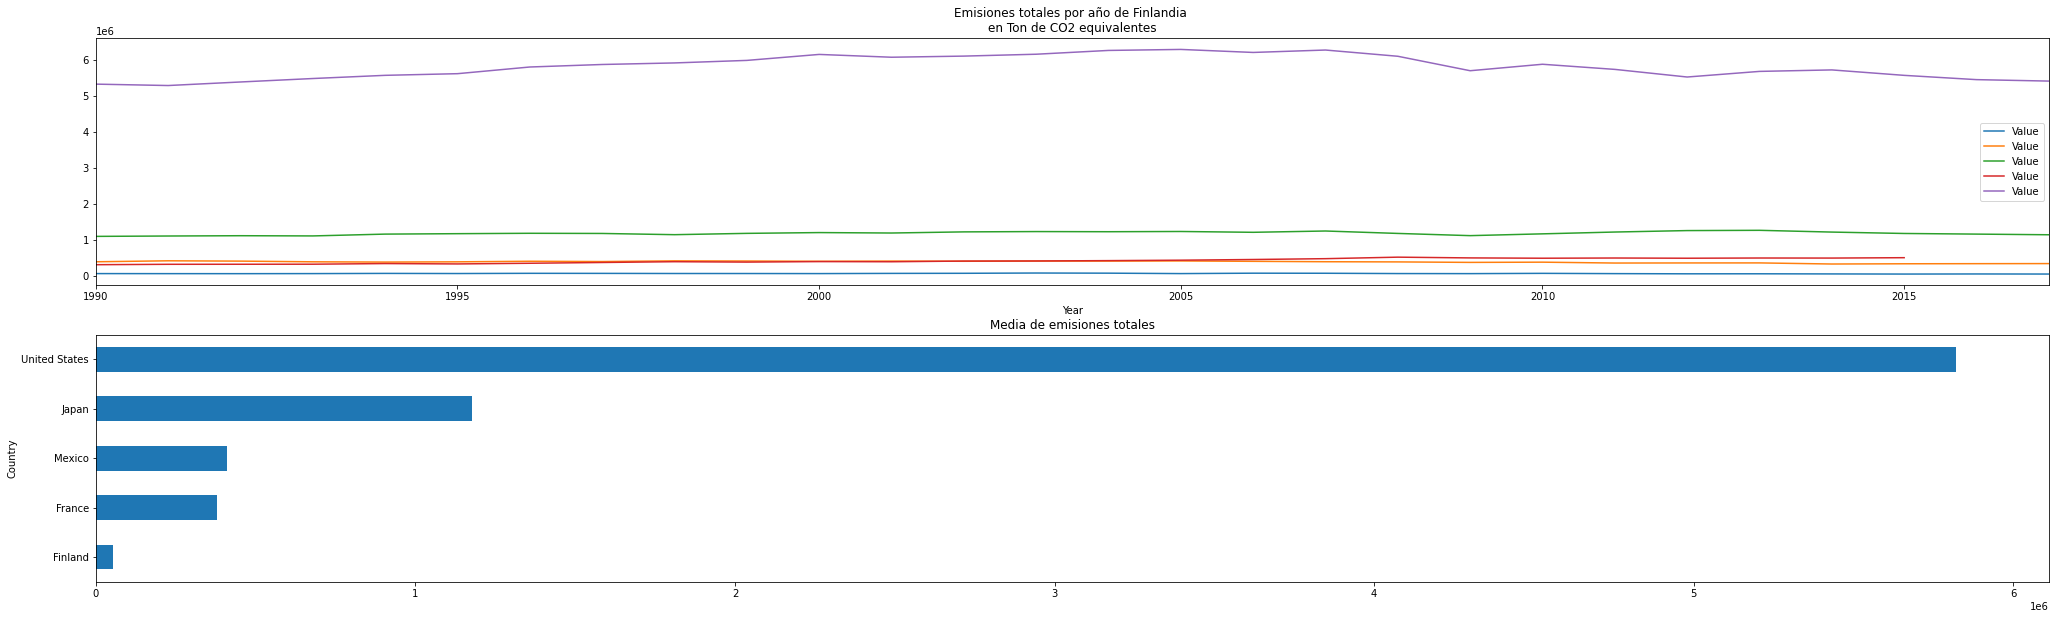

In [126]:
#Emisiones de energía de los países seleccionados
fig, (ax1, ax2) = plt.subplots(2, 1)

emisiones_energia[["Value","Country","Year"]].groupby("Country").plot(kind="line", ax=ax1, x="Year", y="Value",
                                 title="Emisiones totales por año de Finlandia \nen Ton de CO2 equivalentes",
                                 figsize=(35,10), legend=True, stacked=True)


emisiones_energia.groupby('Country')['Value'].mean().sort_values().plot(kind='barh', ax=ax2, figsize=(35,10),
                          title="Media de emisiones totales", stacked=True)

In [412]:
lista_total_mexico = list((emisiones_totales[["Value","Country","Year"]][emisiones_totales.Country == "Mexico"])["Value"])
#(emisiones_totales[["Value","Country","Year"]][emisiones_totales.Country == "Mexico"])

In [227]:
a = (emisiones_totales[["Value","Country","Year"]][emisiones_totales.Country == "Mexico"])
a.loc[1000] = [0,"Mexico", 2019]

In [225]:
def transformInListofValues(dataFrame, name_country):
    return list((emisiones_totales[["Value","Country","Year"]][emisiones_totales.Country == name_country])["Value"])

In [244]:
2019 not in list((emisiones_totales[["Country","Year","Value"]][emisiones_totales.Country=="Mexico"])["Year"])

True

In [405]:
def verifyLen_2(dF, name_country):
    aiuda = ((dF[["Value","Year"]][dF.Country == name_country]))
    i = 0
    for year in range(1990, 2018):
        if year in list(aiuda["Year"]):
            #print(f"{year} sí esta prro ")
            pass
        else:
            #print(f"{year} No esta prro ")
            aiuda.loc[i] = [0,year]
            #print("Pos ya lo agregue prro")
        i+=1
    #print(aiuda)
    return aiuda.sort_values("Year")

In [393]:
def verifyLen(name_country):
    aiuda = ((emisiones_totales[["Value","Year"]][emisiones_totales.Country == name_country]))
    i = 0
    for year in range(1990, 2018):
        if year in list(aiuda["Year"]):
            #print(f"{year} sí esta prro ")
            pass
        else:
            #print(f"{year} No esta prro ")
            aiuda.loc[i] = [0,year]
            #print("Pos ya lo agregue prro")
        i+=1
    
    return aiuda

In [342]:
mexi = list(verifyLen("Mexico")["Value"])
finland = list(verifyLen("Finland")["Value"])
usa = list(verifyLen("United States")["Value"])

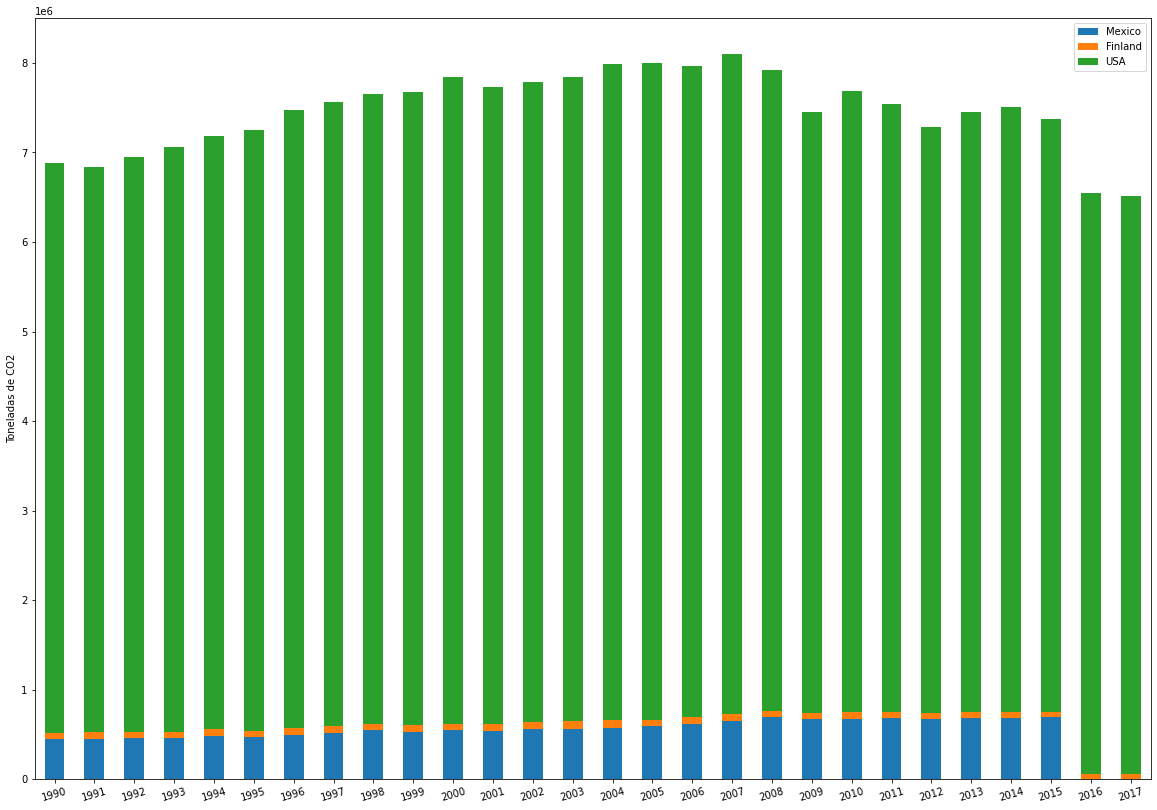

In [368]:
dataFrame = pd.DataFrame(data={"Mexico":mexi, "Finland": finland, "USA": usa} , index=list(years["Year"]))

dataFrame.plot(kind="bar", figsize=(20,14), rot=16, stacked=True)
plt.ylabel("Toneladas de CO2")
plt.show(block=True)

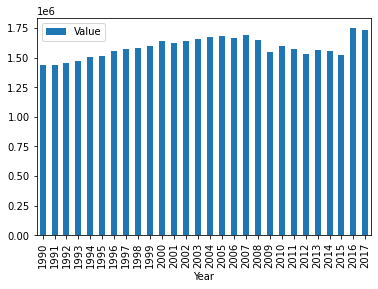

In [131]:
emisiones_energia[["Value","Country","Year"]].groupby("Year").mean().plot.bar()

## Graficos detallados de Finlandia

In [429]:
#Se va a presentar la cantidad de emisiones por sector de Finlandia
finland_total = list(verifyLen_2(emisiones_totales[emisiones_totales.Country == "Finland"],"Finland")["Value"])
finland_energia = list(verifyLen_2(emisiones_energia[emisiones_energia.Country == "Finland"],"Finland")["Value"])
finland_transporte = list(verifyLen_2(emisiones_transporte[emisiones_transporte.Country == "Finland"],"Finland")["Value"])
finland_industriaE = list(verifyLen_2(emisiones_industriaEnergetica[emisiones_industriaEnergetica.Country == "Finland"],"Finland")["Value"])
finland_industria = list(verifyLen_2(emisiones_industria[emisiones_industria.Country == "Finland"],"Finland")["Value"])
finland_agricultura = list(verifyLen_2(emisiones_agricultura[emisiones_agricultura.Country == "Finland"],"Finland")["Value"])
finland_gasto = list(verifyLen_2(emisiones_gasto[emisiones_gasto.Country == "Finland"],"Finland")["Value"])
finland_emisiones_combust = list(verifyLen_2(emisiones_combustibles[emisiones_combustibles.Country == "Finland"],"Finland")["Value"])

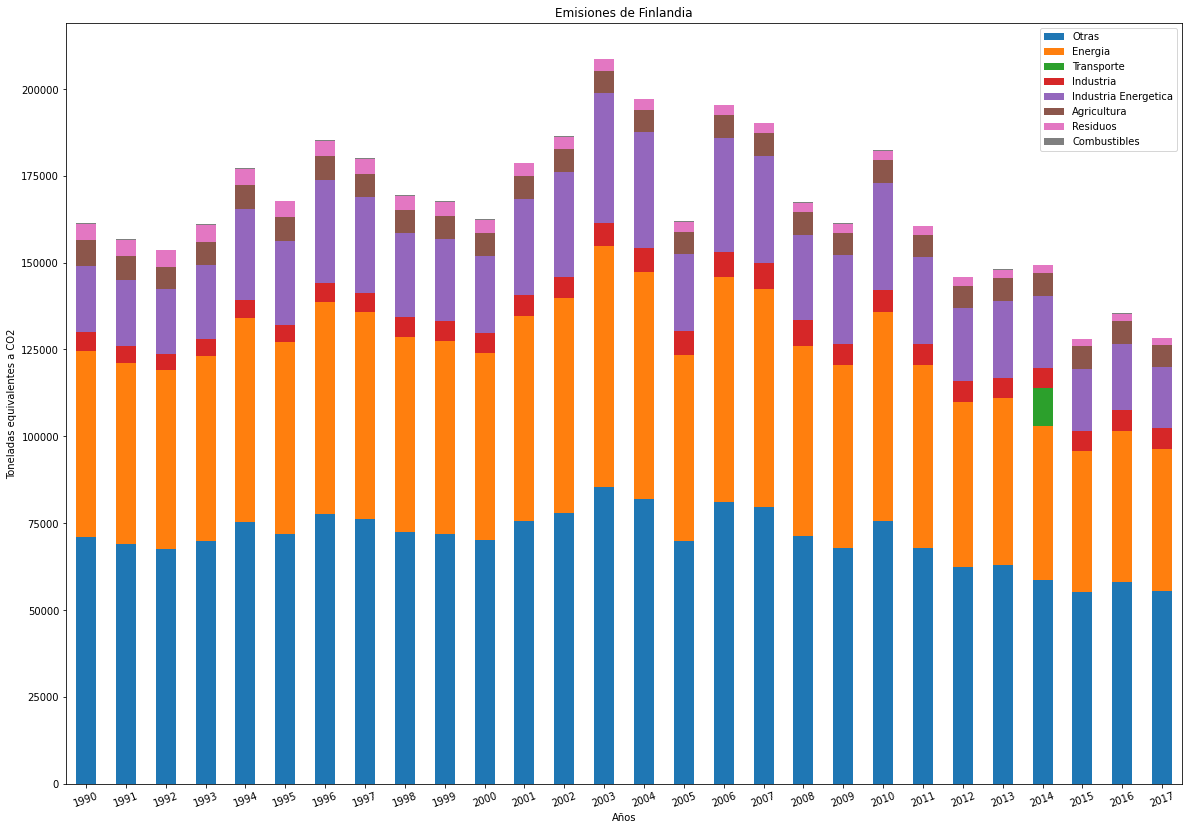

In [433]:
#Generación de grafico de barras
dataFrame = pd.DataFrame(data={"Otras":finland_total, 
                               "Energia": finland_energia,
                               "Transporte": finland_transporte,
                               "Industria": finland_industria,
                               "Industria Energetica": finland_industriaE,
                               "Agricultura": finland_agricultura,
                               "Residuos": finland_gasto,
                              "Combustibles": finland_emisiones_combust} , index=list(years["Year"]))

dataFrame.plot(kind="bar", figsize=(20,14), rot=20, stacked=True, legend="Reverse")
plt.ylabel("Toneladas equivalentes a CO2")
plt.xlabel("Años")
plt.title("Emisiones de Finlandia")
plt.show(block=True)

### Graficos detallados de Mexico

In [422]:
#Se va a presentar la cantidad de emisiones por sector de Finlandia
mexico_total = list(verifyLen_2(emisiones_totales[emisiones_totales.Country == "Mexico"],"Mexico")["Value"])
mexico_energia = list(verifyLen_2(emisiones_energia[emisiones_energia.Country == "Mexico"],"Mexico")["Value"])
mexico_transporte = list(verifyLen_2(emisiones_transporte[emisiones_transporte.Country == "Mexico"],"Mexico")["Value"])
mexico_industriaE = list(verifyLen_2(emisiones_industriaEnergetica[emisiones_industriaEnergetica.Country == "Mexico"],"Mexico")["Value"])
mexico_industria = list(verifyLen_2(emisiones_industria[emisiones_industria.Country == "Mexico"],"Mexico")["Value"])
mexico_agricultura = list(verifyLen_2(emisiones_agricultura[emisiones_agricultura.Country == "Mexico"],"Mexico")["Value"])
mexico_gasto = list(verifyLen_2(emisiones_gasto[emisiones_gasto.Country == "Mexico"],"Mexico")["Value"])
mexico_emisiones_combust = list(verifyLen_2(emisiones_combustibles[emisiones_combustibles.Country == "Mexico"],"Mexico")["Value"])

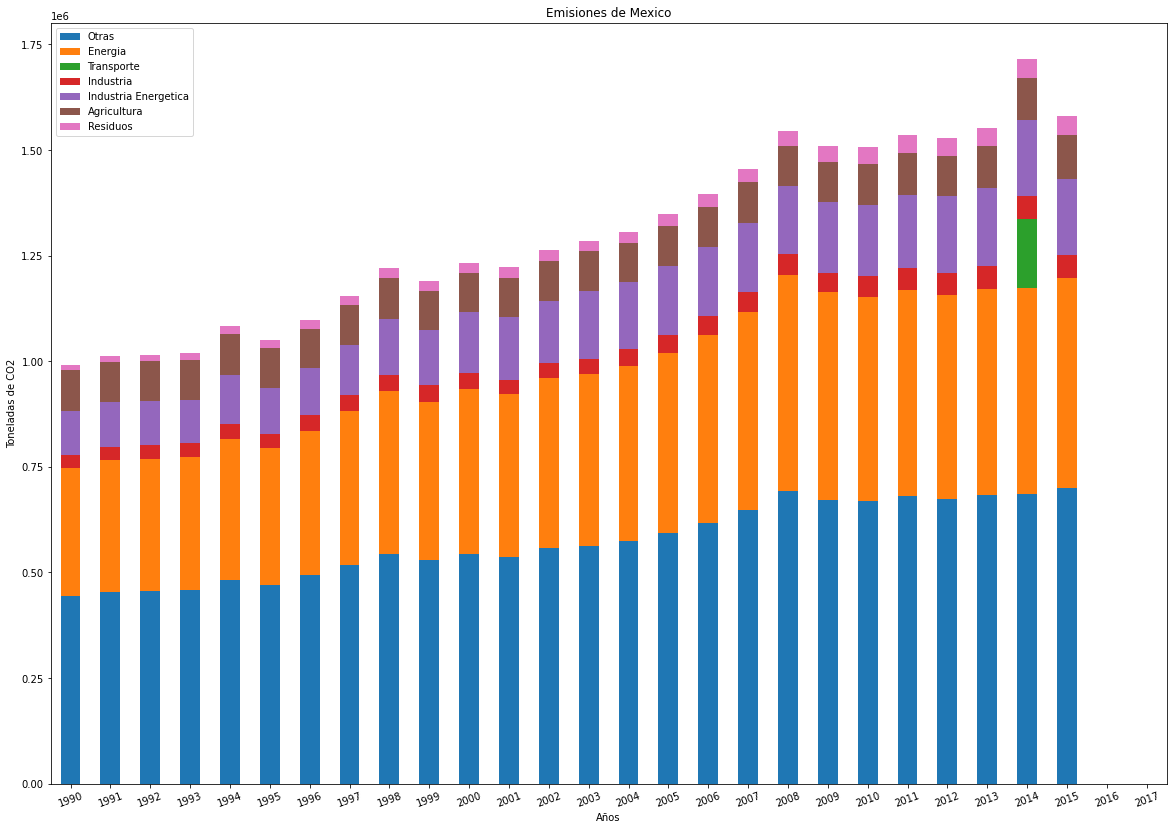

In [428]:
#Generación de grafico de barras
dataFrame = pd.DataFrame(data={"Otras":mexico_total, 
                               "Energia": mexico_energia,
                               "Transporte": mexico_transporte,
                               "Industria": mexico_industria,
                               "Industria Energetica": mexico_industriaE,
                               "Agricultura": mexico_agricultura,
                               "Residuos": mexico_gasto,
                               } , index=list(years["Year"]))

dataFrame.plot(kind="bar", figsize=(20,14), rot=20, stacked=True, legend="Reverse")
plt.ylabel("Toneladas equivalentes a CO2")
plt.xlabel("Años")
plt.title("Emisiones de Mexico")
plt.show(block=True)

## Comparación de resultados


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)

emisiones_totales.groupby("Country").plot(kind="line", ax=ax1, x="Year", y="Value",
                                 title="Emisiones totales por año de Finlandia \nen Ton de CO2 equivalentes",
                                 figsize=(15,10))
emisiones_totales.groupby('Country')['Value'].mean().sort_values().plot(kind='barh', ax=ax2, figsize=(15,10),
                          title="Media de emisiones totales")

Más adelante se van a mostrar graficas de barras con la descomposicones del tipo de emisiones producidas por los paíes a lo largo del tiempo

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/